# Analyzing Motorcyle Sales Data

## Data Munging

**Importing libraries**

In [4]:
#allows plots to be displayed in notebooks and not on a new window
%matplotlib inline 
import numpy as np
import pandas as pd

**Reading the motorcycles sales data**

In [5]:
sales  = pd.read_csv("sales.csv")

**Checking for the first 5 rows of the data**

In [5]:
sales.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,1/6/2021,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,1/6/2021,North,Retail,Breaking system,9,19.29,173.61,Cash
2,1/6/2021,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,1/6/2021,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,1/6/2021,Central,Retail,Engine,2,60.48,120.96,Credit card


**Checking for the data types of the data**

In [6]:
sales.dtypes

date             object
warehouse        object
client_type      object
product_line     object
quantity          int64
unit_price      float64
total           float64
payment          object
dtype: object

**Determine the number of rows and columns in the dataset**

In [7]:
sales.shape

(1000, 8)

**Get column names in the dataset**

In [1]:
sales.columns

NameError: name 'sales' is not defined

**Get the first five rows of the column client type by name**

In [6]:
sales["client_type"][0:6]

0       Retail
1       Retail
2       Retail
3    Wholesale
4       Retail
5    Wholesale
Name: client_type, dtype: object

**Get the first five rows of the column warehouse by name**

In [7]:
sales["warehouse"][1:5]

1      North
2      North
3      North
4    Central
Name: warehouse, dtype: object

**Index the columns of the first 10 rows and first 3 columns**

In [14]:
sales.iloc[0:10,0:3]

,date,warehouse,client_type
0,1/6/2021,Central,Retail
1,1/6/2021,North,Retail
2,1/6/2021,North,Retail
3,1/6/2021,North,Wholesale
4,1/6/2021,Central,Retail
5,1/6/2021,North,Wholesale
6,1/6/2021,West,Retail
7,1/6/2021,Central,Retail
8,1/6/2021,West,Wholesale
9,1/6/2021,North,Retail


In [19]:
sales.loc[:,["client_type","warehouse"]]

,client_type,warehouse
0,Retail,Central
1,Retail,North
2,Retail,North
3,Wholesale,North
4,Retail,Central
...,...,...
995,Retail,Central
996,Wholesale,West
997,Wholesale,West
998,Retail,North


**Order the data by a specific column**

In [22]:
sales.sort_values("total", ascending=True)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
274,26/06/2021,North,Retail,Breaking system,1,10.35,10.35,Credit card
576,22/07/2021,West,Retail,Breaking system,1,10.42,10.42,Credit card
65,8/6/2021,West,Retail,Breaking system,1,10.46,10.46,Credit card
262,25/06/2021,West,Retail,Breaking system,1,10.90,10.90,Credit card
874,17/08/2021,North,Retail,Breaking system,1,10.92,10.92,Credit card
...,...,...,...,...,...,...,...,...
799,10/8/2021,Central,Wholesale,Engine,36,60.73,2186.16,Transfer
316,28/06/2021,Central,Wholesale,Engine,36,62.02,2232.66,Transfer
48,6/6/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
704,2/8/2021,North,Wholesale,Engine,40,58.10,2324.20,Transfer


**Sort data by a column and obtain a cross-section of the data**

In [24]:
sorted_data = sales.sort_values(["quantity"], ascending=True)
sorted_data

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
369,3/7/2021,North,Retail,Engine,1,53.06,53.06,Credit card
817,11/8/2021,West,Retail,Breaking system,1,17.75,17.75,Credit card
177,18/06/2021,West,Retail,Electrical system,1,23.24,23.24,Credit card
412,7/7/2021,West,Retail,Miscellaneous,1,22.07,22.07,Credit card
898,18/08/2021,Central,Retail,Breaking system,1,13.94,13.94,Credit card
...,...,...,...,...,...,...,...,...
493,13/07/2021,Central,Wholesale,Suspension & traction,40,35.06,1402.53,Transfer
755,6/8/2021,North,Wholesale,Suspension & traction,40,40.11,1604.33,Transfer
360,3/7/2021,North,Wholesale,Breaking system,40,15.52,620.87,Transfer
416,7/7/2021,Central,Wholesale,Electrical system,40,20.98,839.33,Transfer


In [59]:
sorted_data = sales.sort_values(["total"], ascending=False)
sorted_data.iloc[:,:].head(5)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
774,08/08/2021,Central,Wholesale,Engine,40,63.66,2546.33,Transfer
704,02/08/2021,North,Wholesale,Engine,40,58.10,2324.20,Transfer
48,06/06/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
316,28/06/2021,Central,Wholesale,Engine,36,62.02,2232.66,Transfer
799,10/08/2021,Central,Wholesale,Engine,36,60.73,2186.16,Transfer


**Obtain Value Counts of all products under product line**

In [24]:
sales["product_line"].value_counts()

Breaking system          230
Suspension & traction    228
Electrical system        193
Frame & body             166
Miscellaneous            122
Engine                    61
Name: product_line, dtype: int64

In [25]:
sales["warehouse"].value_counts(), sales["product_line"].value_counts(), sales["client_type"].value_counts()

(Central    480
 North      340
 West       180
 Name: warehouse, dtype: int64,
 Breaking system          230
 Suspension & traction    228
 Electrical system        193
 Frame & body             166
 Miscellaneous            122
 Engine                    61
 Name: product_line, dtype: int64,
 Retail       775
 Wholesale    225
 Name: client_type, dtype: int64)

**Get the unique value of a column by names**

In [27]:
sales["product_line"].unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

**Get the unique count of the unique values of a column**

In [68]:
len(sales["product_line"].unique())

6

**Index into a column and get the first four rows**

In [28]:
sales.loc[0:10,["total","payment"]]

,total,payment
0,134.83,Credit card
1,173.61,Cash
2,263.45,Credit card
3,605.44,Transfer
4,120.96,Credit card
5,1494.80,Transfer
6,54.41,Credit card
7,224.38,Credit card
8,1579.87,Transfer
9,272.61,Credit card


## Data Aggregration

**Describe data**

In [29]:
sales.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


In [78]:
pd.crosstab(sales["warehouse"],sales["client_type"]),pd.crosstab(sales["product_line"],sales["client_type"])

(client_type  Retail  Wholesale
 warehouse                     
 Central         371        109
 North           263         77
 West            141         39,
 client_type            Retail  Wholesale
 product_line                            
 Breaking system           175         55
 Electrical system         155         38
 Engine                     48         13
 Frame & body              128         38
 Miscellaneous              92         30
 Suspension & traction     177         51)

In [30]:
pd.crosstab(sales["warehouse"],sales["client_type"])

client_type,Retail,Wholesale
warehouse,,
Central,371,109
North,263,77
West,141,39


**Return the subset of a data**

In [6]:
sales[(sales["total"] > 1000) & (sales["warehouse"] == "Central")].head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
48,6/6/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
60,7/6/2021,Central,Wholesale,Suspension & traction,40,28.64,1145.47,Transfer
141,15/06/2021,Central,Wholesale,Engine,28,63.54,1779.07,Transfer
146,15/06/2021,Central,Wholesale,Frame & body,24,48.95,1174.88,Transfer
176,18/06/2021,Central,Wholesale,Frame & body,36,48.44,1743.78,Transfer


In [89]:
subset = sales[(sales["total"] > 1000) & (sales["warehouse"] == "Central")].head()
subset

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
48,06/06/2021,Central,Wholesale,Engine,36,63.41,2282.82,Transfer
60,07/06/2021,Central,Wholesale,Suspension & traction,40,28.64,1145.47,Transfer
141,15/06/2021,Central,Wholesale,Engine,28,63.54,1779.07,Transfer
146,15/06/2021,Central,Wholesale,Frame & body,24,48.95,1174.88,Transfer
176,18/06/2021,Central,Wholesale,Frame & body,36,48.44,1743.78,Transfer


**Obtaining the average sales made in each warehouse and payment**

In [21]:
sales.groupby(["client_type","payment"]).mean("total").sort_values(["total"], ascending = False)

quantity  unit_price       total
client_type payment                                       
Wholesale   Transfer     23.022222   30.443244  709.521467
Retail      Credit card   5.444613   30.337375  167.331669
            Cash          5.405172   29.999828  165.509483

## Visualization

**Number of sales made by client type**

<AxesSubplot:>

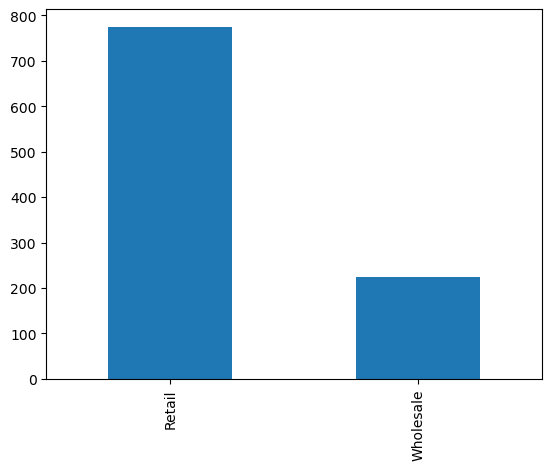

In [39]:
sales.client_type.value_counts().plot(kind = "bar")


**Number of Sales made from each store**

<AxesSubplot: ylabel='warehouse'>

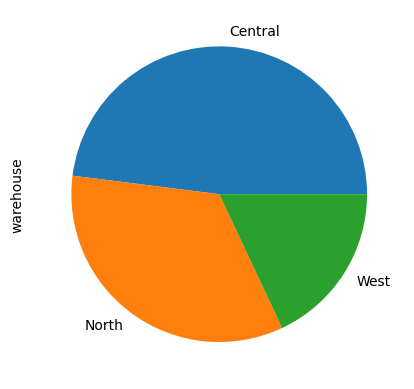

In [27]:
sales.warehouse.value_counts().plot(kind = "pie")

**Total sales made from each payment method**

<AxesSubplot: xlabel='warehouse'>

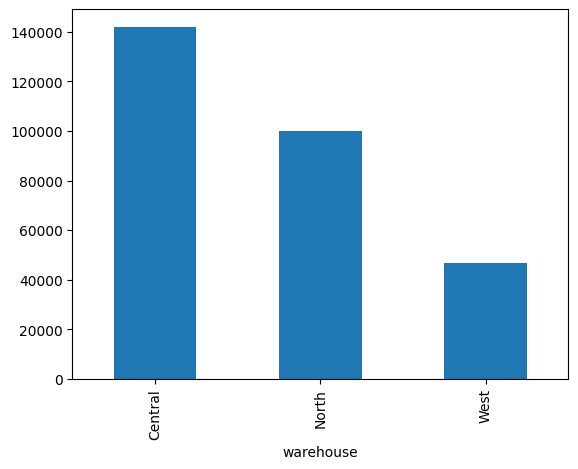

In [32]:
sales.groupby("warehouse")["total"].agg(np.sum).plot(kind = "bar")